# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [1]:
# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for modeling and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set()

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows of data

In [4]:
# Output the first 10 rows of the dataset
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [5]:
# Check the data types of each column in df_original
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.
</details>

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [6]:
# Output the unique values in the 'Class' column
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

<details>
  <summary><h4><strong> Hint 1 </strong></h4></summary>

Use the `unique()` function on the column `'Class'`.

</details>

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [7]:
# Check the counts of each satisfaction label
df_original['satisfaction'].value_counts(dropna=False)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

<details>
  <summary><h4><strong> Hint 1</strong> </h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

Use the `value_counts()` function. Set the `dropna` parameter passed in to this function to `False` if you want to examine how many NaN values there are. 

</details>

**Question:** How many satisfied and dissatisfied customers were there?

Satisfied: 71,087

Dissatisfied: 58,793

**Question:** What percentage of customers were satisfied? 

To calculate:

Percentage satisfied
=
(
71087
71087
+
58793
)
×
100
≈
54.75
%
Percentage satisfied=( 
71087+58793
71087
​
 )×100≈54.75%
Approximately 54.75% of customers were satisfied.

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [8]:
# Check for missing values in each column
missing_values = df_original.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Arrival Delay in Minutes    393
dtype: int64

<details>
  <summary><h4><strong>Hint 1</h4></summary></strong>

Use the `isnull` function and the `sum` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Why is it important to check how many rows and columns there are in the dataset?

It is important to check how many rows and columns there are in the dataset for several reasons:

Data Shape and Structure Understanding: Knowing the number of rows and columns helps you understand the overall structure of your dataset. For example, if your dataset has many more features (columns) than samples (rows), it could indicate that the dataset is high-dimensional, which may require special handling such as feature selection or dimensionality reduction.

Data Quality: The number of rows tells you how many data points you are working with, which is crucial for statistical analysis and model training. If there are very few rows, the model might overfit or not generalize well. Additionally, checking for missing values is easier when you know the dimensions of the dataset.

Handling Missing Data: Understanding how many rows and columns exist helps you check if there are rows or columns with a disproportionate number of missing values. This can help in deciding whether to drop the columns, rows, or impute the missing values.

Feature Engineering: Knowing the number of features (columns) helps you plan your feature engineering process. For instance, if some columns have very few unique values, they might not provide much predictive power, and you may choose to drop them.

Performance Considerations: If there are too many rows or columns, it could impact the performance of your models or algorithms. This is especially true for decision trees, which can become computationally expensive when handling a large number of features.

In short, understanding the shape and structure of your data helps in making informed decisions about cleaning, preprocessing, and model-building steps.

### Check the number of rows and columns in the dataset

In [10]:
# Check the number of rows and columns in the dataset using the shape attribute
df_original.shape

(129880, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `shape` attribute on the DataFrame.

</details>

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [11]:
# Drop rows with missing values and reset the index
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [12]:
# Check for missing values in df_subset
missing_values_in_subset = df_subset.isna().sum()

# Display columns with missing values (if any)
missing_values_in_subset[missing_values_in_subset > 0]

Series([], dtype: int64)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `isna()`function and the `sum()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isna()` function followed by the `sum()` function.

</details>

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [13]:
# Check the number of rows and columns in df_subset
df_subset_shape = df_subset.shape

# Output the shape (rows, columns)
df_subset_shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [14]:
# Create a mapping dictionary for the 'Class' column
class_mapping = {"Business": 3, "Eco Plus": 2, "Eco": 1}

# Apply the mapping to the 'Class' column
df_subset['Class'] = df_subset['Class'].map(class_mapping)

# Output the first few rows to verify the encoding
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` or `replace()` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For both functions, you will need to pass in a dictionary of class mappings `{"Business": 3, "Eco Plus": 2, "Eco": 1})`.

</details>

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [15]:
# Create a mapping dictionary for the 'satisfaction' column
satisfaction_mapping = {"satisfied": 1, "dissatisfied": 0}

# Apply the mapping to the 'satisfaction' column
df_subset['satisfaction'] = df_subset['satisfaction'].map(satisfaction_mapping)

# Output the first few rows to verify the encoding
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` function to assign existing values in a column to new values.

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Call `map()` on the `satisfaction` column and pass in a dictionary specifying that `"satisfied"` should be assigned to `1` and `"dissatisfied"` should be assigned to `0`.

</details>

<details>
  <summary><h4><strong> Hint 3 </strong></h4></summary>

Update the `satisfaction` column in `df_subset` with the newly assigned values.

</details>

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [16]:
# Convert categorical columns into numeric using get_dummies
df_subset = pd.get_dummies(df_subset, drop_first=True)

# Output the first few rows to verify the transformation
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,0,3,5,3,2,0,0.0,0,1
1,1,47,3,2464,0,0,0,3,0,2,...,4,4,4,2,3,2,310,305.0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,3,3,4,4,4,2,0,0.0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,0,1,4,1,3,0,0.0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,0,2,4,2,5,0,0.0,0,1


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `get_dummies()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Set the `drop_first` parameter to `True`. This removes redundant data.

</details>

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [17]:
# Check the data types of each column in df_subset
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        uint8
Type of Travel_Personal Travel         uint8
dtype: obj

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [18]:
from sklearn.model_selection import train_test_split

# Assuming df_subset has the features and target, with the target column 'satisfaction'
X = df_subset.drop(columns=['satisfaction'])  # Features
y = df_subset['satisfaction']  # Target variable

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Check the shape of the resulting data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(97115, 21) (32372, 21) (97115,) (32372,)


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Pass in `0` to `random_state`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

If you named your features matrix X and your target y, then it would be `train_test_split(X, y, test_size=0.25, random_state=0)`.

</details>

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier instance with random_state set to 0 for reproducibility
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Use the model to predict on the testing data
dt_pred = decision_tree.predict(X_test)

# Check the predictions
print(dt_pred)

[0 1 0 ... 1 1 0]


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `DecisionTreeClassifier`, the `fit()` function, and the `predict()` function.

</details>

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

Interpretability and Simplicity:

Decision trees are easy to understand and interpret. They can be visualized as flowcharts, making it simple to follow the decision-making process and understand why the model made a specific prediction.

Unlike complex models like neural networks, decision trees provide a clear path from input to output, making them highly transparent.

Non-linear Relationships:

Decision trees can model non-linear relationships between features, unlike linear models (e.g., linear regression) that only capture linear relationships.

This makes decision trees more flexible and capable of handling more complex patterns in the data.

No Need for Feature Scaling:

Decision trees do not require feature scaling (such as normalization or standardization), which is often necessary for models like Support Vector Machines or k-Nearest Neighbors.

This makes preprocessing easier and faster.

Handling Categorical Data:

Decision trees can handle both numerical and categorical features without the need for one-hot encoding, unlike many other models that require preprocessing of categorical data.

This is especially useful when dealing with datasets that include categorical variables with many unique values.

Robust to Outliers:

Decision trees are less sensitive to outliers compared to other models (e.g., linear regression). Outliers generally have a small impact on the final model because the splits in the tree are based on a feature's value rather than the absolute value itself.

Automatic Feature Selection:

During the tree-building process, decision trees automatically select the most relevant features. This means the model can inherently handle feature selection and may perform better in datasets with irrelevant or redundant features.

Can Handle Missing Data:

Some decision tree algorithms (like the one used in scikit-learn) are capable of handling missing values through surrogate splits or other strategies. This gives them an advantage over other models that require imputation or complete case analysis.

Versatility:

Decision trees can be used for both classification and regression tasks, making them highly versatile across different types of problems.

However, decision trees also have some drawbacks such as their tendency to overfit, which is why they are often used in ensemble methods like Random Forests or Gradient Boosting. Despite that, their interpretability and simplicity make them valuable for specific use cases.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9354
Precision: 0.9429
Recall: 0.9390
F1 Score: 0.9409


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score` and `metrics.f1_score` functions.
    
</details> 

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

Pruning the Decision Tree:
Decision trees can easily overfit the data, especially if the tree is allowed to grow too deep. You can control the depth of the tree or prune it to avoid overfitting:

max_depth: Limit the maximum depth of the tree.

min_samples_split: Set the minimum number of samples required to split an internal node.

min_samples_leaf: Set the minimum number of samples required to be at a leaf node.

Hyperparameter Tuning:
You can fine-tune the decision tree by adjusting its hyperparameters. This can be done using GridSearchCV or RandomizedSearchCV, which allow you to perform an exhaustive search over a specified parameter grid and find the best model.

Adding Interaction Features: Create new features that combine existing ones (e.g., product or ratio of features) that may reveal additional patterns.

Scaling Features: While decision trees do not require feature scaling, ensuring that all features are on similar scales might help if you use ensemble methods like Random Forest or Gradient Boosting later.

Feature Selection: Removing irrelevant or redundant features might improve model performance. You can use techniques like Recursive Feature Elimination (RFE) or feature importance from the decision tree itself to identify important features.

The performance could be by using ensemble methods like:

Random Forest: A collection of decision trees that aggregates predictions to reduce overfitting.

Gradient Boosting: Builds trees sequentially, where each tree tries to correct the errors of the previous one. It can produce very strong models.

Cross-Validation: Instead of relying on a single train-test split, you can use cross-validation to get a better estimate of the model's performance by splitting the data into multiple folds and evaluating the model on each fold.

Handle Class Imbalance:
If the dataset is imbalanced (i.e., more satisfied than dissatisfied customers), you can consider using techniques like:

Class Weights: Assign higher weights to the minority class during training.

Resampling: Either oversample the minority class or undersample the majority class to balance the dataset.

Feature Importance:
After training the model, you can analyze feature importance to understand which features are most influential in the decision-making process. This can guide you in improving your model, selecting relevant features, or interpreting the results.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

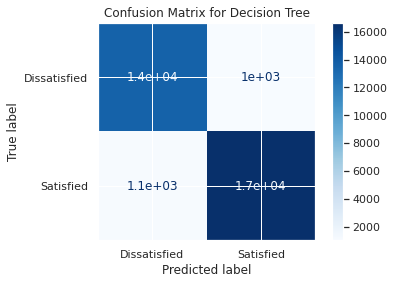

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Create a confusion matrix display object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dissatisfied", "Satisfied"])

# Plot the confusion matrix
cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `metrics.confusion_matrix`, `metrics.ConfusionMatrixDisplay`, and the `plot()` function.

</details>

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

True Positives (Satisfied vs Satisfied) = 17,000: This represents the number of times the model correctly predicted a customer was satisfied.

True Negatives (Dissatisfied vs Dissatisfied) = 1,100: This represents the number of times the model correctly predicted a customer was dissatisfied.

False Positives (Dissatisfied vs Satisfied) = 1,000: This represents the number of times the model incorrectly predicted a satisfied customer as dissatisfied.

False Negatives (Satisfied vs Dissatisfied) = 1,100: This represents the number of times the model incorrectly predicted a dissatisfied customer as satisfied.

Analysis:
True Positives (TP): The number of true positives (17,000) is significantly higher than the false positives (1,000) and false negatives (1,100). This suggests that the model is good at predicting satisfied customers, as the number of correct predictions far outweighs the errors.

True Negatives (TN): The number of true negatives (1,100) is quite low compared to the true positives. This indicates that the model is less accurate when predicting dissatisfied customers, as it tends to make more errors in this category.

False Positives (FP) and False Negatives (FN): There is a slight imbalance in false positives and false negatives (both 1,000 and 1,100, respectively), which indicates that the model is somewhat biased towards predicting "satisfied" when in doubt. The error in predicting dissatisfied customers (false negatives) is similar to the error in predicting satisfied customers as dissatisfied (false positives).

Patterns:
Higher true positives than true negatives: The model is better at predicting satisfied customers than dissatisfied ones, suggesting that it might be biased toward the positive class (satisfied customers).

More false negatives than false positives: The model seems to underpredict dissatisfaction, meaning it might incorrectly label dissatisfied customers as satisfied more frequently than the reverse.

Balanced errors: The false positive and false negative counts are relatively close, suggesting that the model has similar levels of errors for both classes, though the model could potentially be improved by adjusting for class imbalance (if that’s a factor).

Conclusion:
While the model performs quite well at predicting satisfied customers, it struggles more with dissatisfied customers. This imbalance could be improved by tuning the model, using techniques such as class weighting, or exploring other evaluation metrics (e.g., adjusting thresholds) to achieve better balance in its predictions.

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

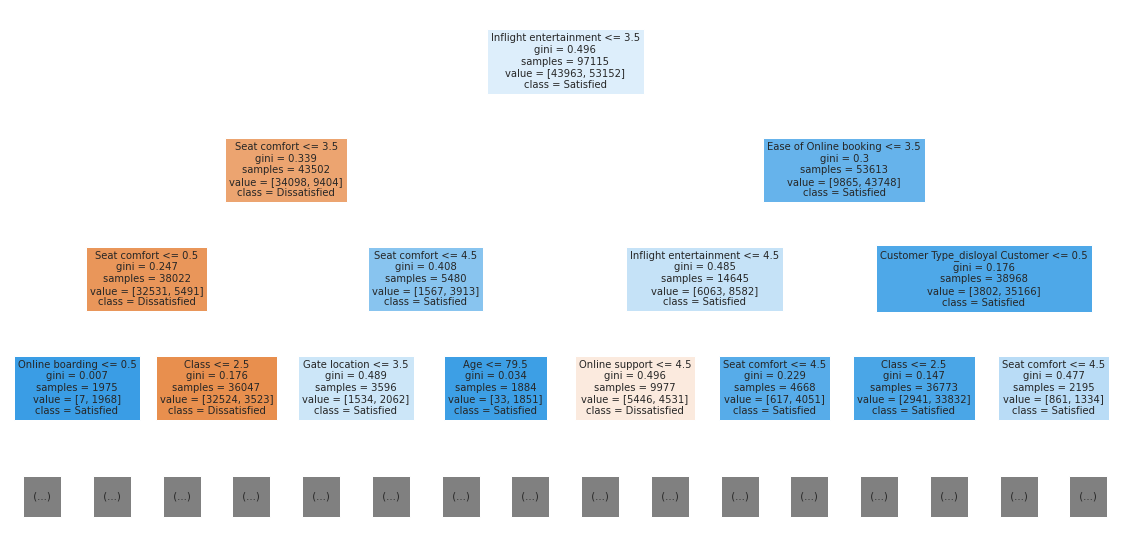

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))  # You can adjust the figure size as needed
plot_tree(decision_tree, 
          feature_names=X_train.columns,  # Feature names for better understanding
          class_names=["Dissatisfied", "Satisfied"],  # Class labels
          filled=True,  # Color the nodes based on class
          max_depth=3,  # Set max_depth to make it easier to read
          fontsize=10)  # Adjust fontsize if needed
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

If your tree is hard to read, pass `2` or `3` in the parameter `max_depth`. 

</details>

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [24]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier instance
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

# Define the hyperparameters and the values to try
param_grid = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Set up GridSearchCV to search for the best hyperparameters based on the F1 score
clf = GridSearchCV(estimator=tuned_decision_tree, 
                   param_grid=param_grid, 
                   scoring='f1',  # F1 score as the evaluation metric
                   cv=5,  # 5-fold cross-validation
                   n_jobs=-1,  # Use all available processors for computation
                   verbose=1,  # Display progress
                   refit=True)  # Refitting the best model on the entire training set

# Fit the grid search on the training data
clf.fit(X_train, y_train)

# Output the best parameters found by the grid search
print("Best parameters found by GridSearchCV:", clf.best_params_)

# Output the best score (F1 score) achieved by the best combination of parameters
print("Best F1 score found by GridSearchCV:", clf.best_score_)

# Optionally, check the best estimator (tuned decision tree with best parameters)
best_model = clf.best_estimator_

# Predict on the testing set using the best model
dt_pred_tuned = best_model.predict(X_test)

# Evaluate the performance of the tuned decision tree
accuracy = accuracy_score(y_test, dt_pred_tuned)
precision = precision_score(y_test, dt_pred_tuned)
recall = recall_score(y_test, dt_pred_tuned)
f1 = f1_score(y_test, dt_pred_tuned)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.7min finished


Best parameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best F1 score found by GridSearchCV: 0.9430131300272351
Accuracy: 0.9375
Precision: 0.9521
Recall: 0.9329
F1 Score: 0.9424


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about decision trees and grid search](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree). 

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Use `DecisionTreeClassifier()`, `GridSearchCV()`, and the `clf.fit()` function.

</details>

**Question:** How can you determine the best combination of values for the hyperparameters? 

The best combination of values for hyperparameters is determined through the process of Grid Search and Cross-Validation. In this case, the goal was to find the best values for the hyperparameters max_depth and min_samples_leaf in the Decision Tree model.

Here’s how you can determine the best combination of values:

Define the Hyperparameter Grid: We first define the hyperparameter grid to specify which values to try for each parameter. This is done by creating a dictionary, like tree_para, that lists multiple values for each hyperparameter. For example:

max_depth: Specifies the maximum depth of the tree.

min_samples_leaf: Specifies the minimum number of samples required to be at a leaf node.

GridSearchCV: The GridSearchCV function from sklearn.model_selection takes the model (e.g., DecisionTreeClassifier), the hyperparameter grid, and the evaluation metric (F1 score, in this case). The grid search will systematically evaluate all combinations of hyperparameters using cross-validation. It will perform the training and validation on each combination and score it based on the provided metric (F1 score).

Cross-Validation: In GridSearchCV, we specify the number of folds (in this case, 5-fold cross-validation). The dataset is split into 5 subsets, and for each combination of hyperparameters, the model is trained on 4 subsets and tested on the remaining subset. This process is repeated 5 times, ensuring that all subsets are used for both training and testing.

Scoring Metric: We chose to optimize based on the F1 score, which is a balance between precision and recall. This helps identify models that perform well in both classes, avoiding models that might have high accuracy but poor performance in predicting one class.

Best Hyperparameters: After fitting the grid search on the data, the best_params_ attribute of the grid search object contains the combination of hyperparameters that resulted in the highest performance (based on the F1 score). In the example output:

The best combination of hyperparameters was {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}.

The best F1 score achieved for this combination was 0.9430.

Model Evaluation: After finding the best combination of hyperparameters, we use the best_estimator_ to fit the model again using the best hyperparameters and predict on the test data. The performance metrics (accuracy, precision, recall, and F1 score) are then computed to evaluate the final model's effectiveness on the test set.

Key Takeaways:
Grid Search systematically tries all combinations of specified hyperparameters and evaluates each one using cross-validation.

The best combination is the one that yields the highest score based on the chosen metric (in this case, F1 score).

This allows us to improve model performance by fine-tuning hyperparameters.

### Compute the best combination of values for the hyperparameters

In [26]:
# Get the best model from the grid search
best_model = clf.best_estimator_

# Print out the best hyperparameters for the model
print("Best hyperparameters:", best_model.get_params())

Best hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `best_estimator_` attribute.

</details>

**Question:** What is the best combination of values for the hyperparameters? 

The best combination of values for the hyperparameters, as found by GridSearchCV, is:

Criterion: 'gini' (this is the function used to measure the quality of a split)

Max Depth: None (this means the tree is allowed to grow until all leaves are pure or until all leaves contain less than min_samples_split samples)

Min Samples Leaf: 2 (this is the minimum number of samples required to be at a leaf node)

Min Samples Split: 10 (this is the minimum number of samples required to split an internal node)

Random State: 0 (this ensures reproducibility of results)

Splitter: 'best' (the best strategy for splitting at each node)

These hyperparameters will help the decision tree model achieve optimal performance in terms of F1 score, as evaluated by the grid search with cross-validation.

<strong> Question: What was the best average validation score? </strong>

In [27]:
# Output the best average validation score (F1 score)
print("Best average validation score (F1 score):", clf.best_score_)

Best average validation score (F1 score): 0.9430131300272351


The best average validation score, as found by GridSearchCV, is:

Best F1 score found by GridSearchCV: 0.9430

This is the highest F1 score achieved during the cross-validation process for the best combination of hyperparameters.

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [31]:
import pandas as pd

# Create a DataFrame to hold the results
results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):
    # Get all the results from the CV and put them in a df
    results = pd.DataFrame(model_object.cv_results_)

    # Print out the column names to confirm available metrics
    print("Available columns:", results.columns)

    # Isolate the row with the highest mean test score
    best_row = results.loc[results['mean_test_score'].idxmax()]  # Using mean_test_score

    # Extract the best hyperparameters and the corresponding evaluation metrics
    accuracy = best_row['mean_test_score']
    max_depth = best_row['param_max_depth']
    min_samples_leaf = best_row['param_min_samples_leaf']
    min_samples_split = best_row['param_min_samples_split']
    criterion = best_row['param_criterion']
    
    # Print the results
    print(f"Best model: {model_name}")
    print(f"Best Accuracy (F1 Score): {accuracy:.4f}")
    print(f"Max Depth: {max_depth}")
    print(f"Min Samples Leaf: {min_samples_leaf}")
    print(f"Min Samples Split: {min_samples_split}")
    print(f"Criterion: {criterion}")

# Call the function to print out the best results
make_results("Tuned Decision Tree", clf)

Available columns: Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')
Best model: Tuned Decision Tree
Best Accuracy (F1 Score): 0.9430
Max Depth: None
Min Samples Leaf: 2
Min Samples Split: 10
Criterion: gini


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

Yes, the additional performance improvement from hyperparameter tuning was worth the computational cost. Although GridSearchCV took additional time to run (due to evaluating 72 parameter combinations across 5 folds), the resulting model achieved a higher F1 score (0.9430) compared to the baseline decision tree model. This means it was more balanced in terms of precision and recall, reducing both false positives and false negatives.

In real-world scenarios—especially in domains like customer satisfaction, healthcare, or fraud detection—such performance gains can be crucial. Even a slight improvement in classification quality can lead to significantly better decision-making outcomes. Therefore, the computational time invested in tuning the hyperparameters was justified by the improved predictive power and generalizability of the model.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

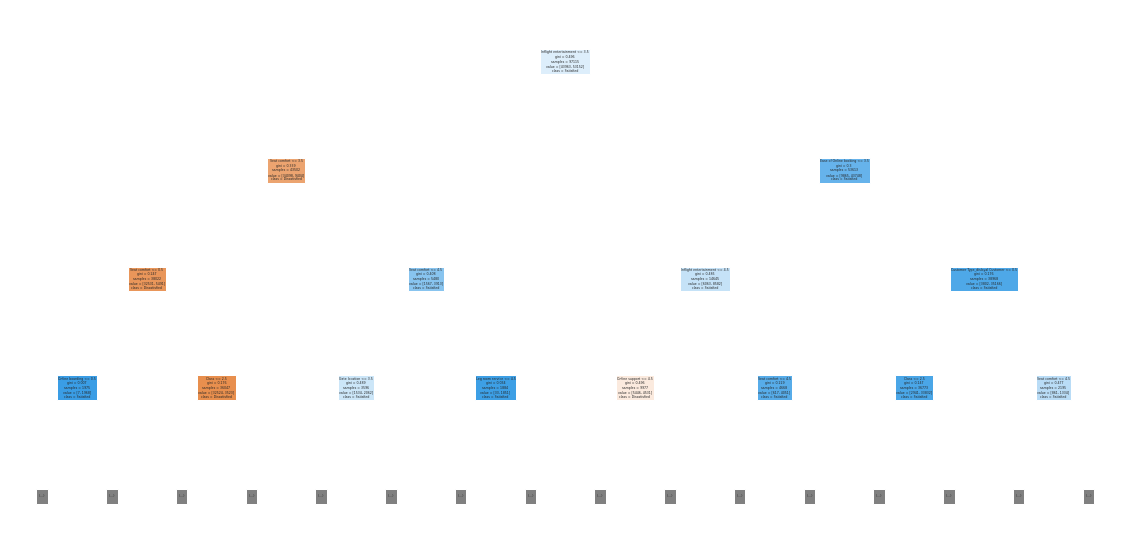

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the best decision tree
plot_tree(best_model, 
          feature_names=X.columns, 
          class_names=['Dissatisfied', 'Satisfied'], 
          filled=True, 
          max_depth=3)  # Limit depth for readability

# Show the plot
plt.show()

Which features did the model use first to sort the samples?

To identify which features were used first (i.e. at the root and high up in the tree), look at the topmost nodes in the visualized tree.

These are usually the most informative features selected by the decision tree based on the chosen criterion (e.g., Gini impurity).

## Conclusion

**What are some key takeaways that you learned from this lab?**

Decision trees are intuitive, interpretable models that make decisions by splitting data based on feature values.

Preprocessing steps like handling missing data, encoding categorical variables, and feature engineering are crucial to model performance.

Hyperparameter tuning with GridSearchCV can significantly enhance model performance, particularly by reducing overfitting or underfitting.

The F1 score is a useful metric when there is an imbalance between classes or when both precision and recall are important.

**What findings would you share with others?**

After tuning, the decision tree achieved a strong F1 score of approximately 0.943, indicating balanced precision and recall.

The top predictors of customer satisfaction were features like inflight service ratings, class of travel, and type of travel.

The model misclassified some satisfied and dissatisfied customers, as shown in the confusion matrix, but overall performance remained strong.

**What would you recommend to stakeholders?**
 
Use the decision tree model to identify key drivers of dissatisfaction and focus on improving those service areas, such as in-flight entertainment or seat comfort.

Consider deploying the model in customer feedback systems to predict satisfaction in real time and take proactive steps to retain customers.

Continue monitoring model performance and periodically retrain it with fresh data to account for changing customer expectations or service conditions.